# Data Visualization - Assignment 1

## Submitted by - Abhieshree Dhami, Chhandosee Bhattacharya, Rucha Kulkarni, Tony De

In [1]:
# Imports the print function from newer versions of python
from __future__ import print_function

import cv2
import random
import numpy as np
from linalg import *
from imageManip import *
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray' 

ModuleNotFoundError: No module named 'cv2'

In [2]:
# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

## Question 1.1

In [3]:
M = np.array([[1,2,3],
              [4,5,6],
              [7,8,9],
              [10,11,12]])

a = np.array([[1,1,0]])

b = np.array([[-1],[2],[5]])

print("M = \n", M)
print("The size of M is: ", M.shape)
print()
print("a = ", a)
print("The size of a is: ", a.shape)
print()
print("b = ", b)
print("The size of b is: ", b.shape)

M = 
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
The size of M is:  (4, 3)

a =  [[1 1 0]]
The size of a is:  (1, 3)

b =  [[-1]
 [ 2]
 [ 5]]
The size of b is:  (3, 1)


## Question 1.2

In [4]:
#convert both to row vectors
squeezed_a = np.squeeze(a)
squeezed_b = np.squeeze(b)
#dot product
aDotB = dot_product(squeezed_a, squeezed_b)
print(aDotB)

1


## Question 1.3

In [5]:
ans = complicated_matrix_function(M, a, b)
print(ans)
print()
print("The size is: ", ans.shape)

[[ 3]
 [ 9]
 [15]
 [21]]

The size is:  (4, 1)


# Question 2

**Note**: matplotlib inline has been used to display images. To use, cv2, uncomment cv2.imshow blocks

In [6]:
image1_path = 'image1.jpg'
image2_path = 'image2.jpg'

def display(img):
    # if image is bgr(as read in by CV2), convert it to rgb for display by matplotlib 
    if(img.ndim==3):
        img = img[:,:,::-1]
    plt.figure(figsize = (5,5))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

## Question 2.1

image1


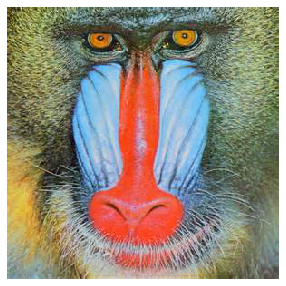

image2


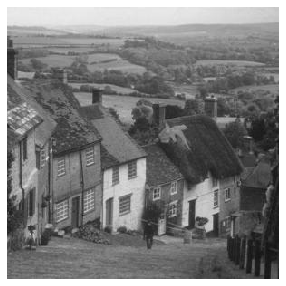

In [7]:
image1 = cv2.imread(image1_path)
image2 = cv2.imread(image2_path)

print("image1")
display(image1)

print("image2")
display(image2)

# cv2.imshow('image1', image1)
# cv2.imshow('image2', image2)

# #waits for user to press any key  
# #(this is necessary to avoid Python kernel form crashing) 
# cv2.waitKey(0)  
# #closing all open windows  
# cv2.destroyAllWindows()


## Question 2.2

1) a x image adjusts brightness
2) image ** a adjusts contrast

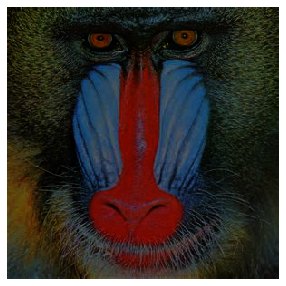

In [8]:
new_image = dim_image(image1)
display(new_image)

## Question 2.3

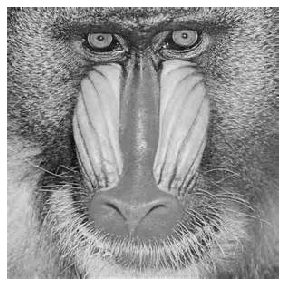

In [9]:
grey_image = convert_to_grey_scale(image1)
display(grey_image)

## Question 2.4

Without the red channel


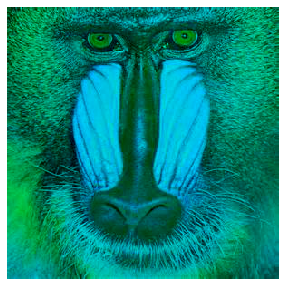

Without the green channel


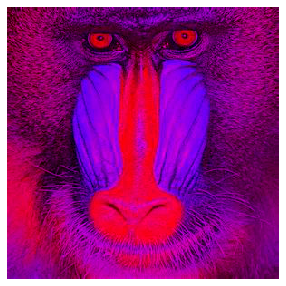

Without the blue channel


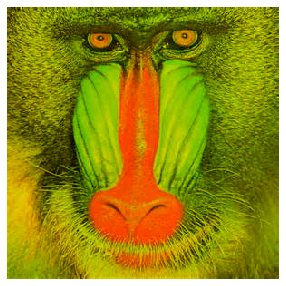

In [10]:
without_red = rgb_exclusion(image1, 'R')
without_blue = rgb_exclusion(image1, 'B')
without_green = rgb_exclusion(image1, 'G')

print("Without the red channel")
display(without_red)
print("Without the green channel")
display(without_green)
print("Without the blue channel")
display(without_blue)

# cv2.imshow('Without Red', without_red)
# cv2.imshow('Without Green', without_green)
# cv2.imshow('Without Blue', without_blue)

# cv2.waitKey(0)  
# cv2.destroyAllWindows()

## Question 2.5

**Hue** : Represents the color of the pixel. Value corressponds to a particular color on the color wheel.

**Saturation** : Represents purity of a color. A highly saturated pixel will be a pure color, low saturation will have more white mixed in.

**Value** : Amount to which the respective color is mixed with black. Lower value corresponds to darker(blacker) color while high value corresponds to a purer color.

Image with only H channel


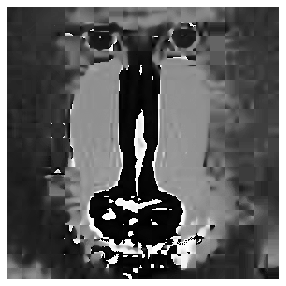

Image with only S channel


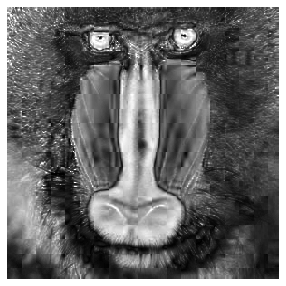

Image with only V channel


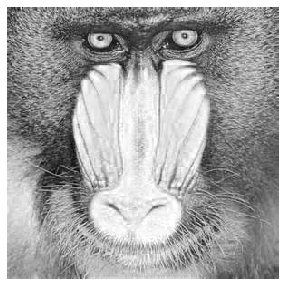

In [11]:
image_h = hsv_decomposition(image1, 'H')
image_s = hsv_decomposition(image1, 'S')
image_v = hsv_decomposition(image1, 'V')

print("Image with only H channel")
display(image_h)
print("Image with only S channel")
display(image_s)
print("Image with only V channel")
display(image_v)

# cv2.imshow('Image H', image_h)
# cv2.imshow('Image S', image_s)
# cv2.imshow('Image V', image_v)

# cv2.waitKey(0)  
# cv2.destroyAllWindows()

## Question 2.6

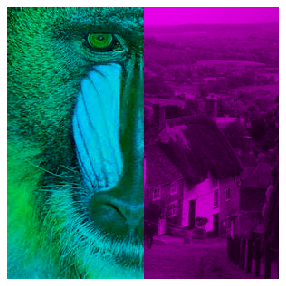

In [12]:
image_mixed = mix_images(image1, image2, channel1='R', channel2='G')
display(image_mixed)

# cv2.imshow('Mixed Image', image_mixed)
# cv2.waitKey(0)  
# cv2.destroyAllWindows()

## Question 2.7

In [13]:
image_paper = cv2.imread('adt.jpg')
image_paper.shape

(2467, 3211, 3)

Resize image as the read in image is too large and convert it to gray scale for adaptive thresholding

In [14]:
resized = cv2.resize(image_paper, (image_paper.shape[1]//9, image_paper.shape[0]//9))

cvt_gray = convert_to_grey_scale(resized)

Image clicked by camera


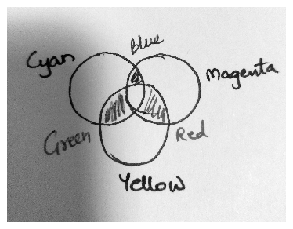

Image with adaptive thresholding


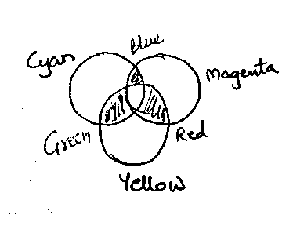

In [15]:
th = cv2.adaptiveThreshold(cvt_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 20)
print("Image clicked by camera")
display(cvt_gray)
print("Image with adaptive thresholding")
display(th)

# cv2.imshow('original_paper_image', cvt_gray)
# cv2.imshow('th_paper_image', th)

# cv2.waitKey(0)  
# cv2.destroyAllWindows()